In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Data loading 

In [2]:
df=pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Exploration

## 1. basic data exploration

In [3]:
df.shape

(150, 6)

In [4]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
len(df.columns)

6

<Axes: >

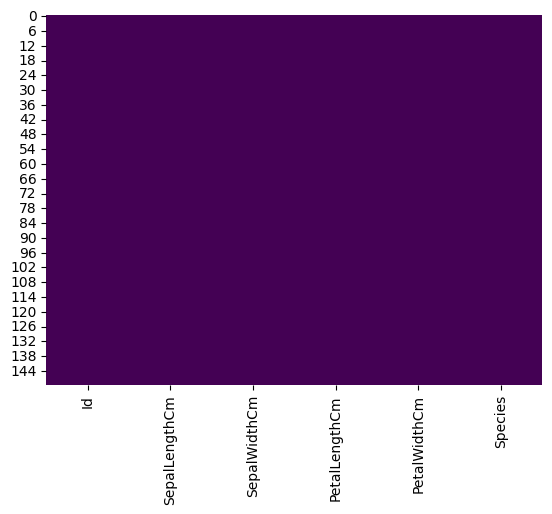

In [9]:
 sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 2. data distribution

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


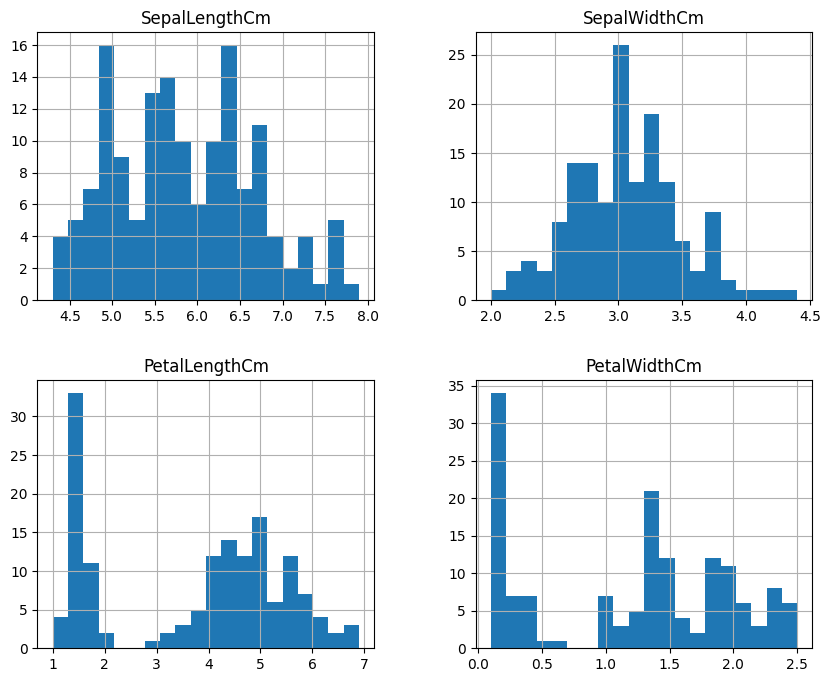

In [11]:
col_features=[col for col in df.columns if col!="Id" and col!="Species"]
print(col_features)
df[col_features].hist(bins=20,figsize=(10,8))
plt.show()

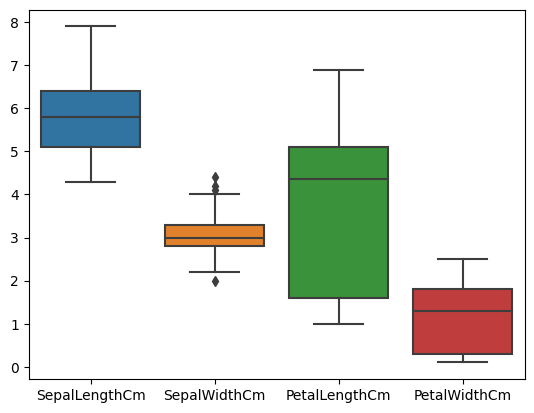

In [12]:
#plt.figure(figsize=(10,8))
sns.boxplot(data=df[col_features])
plt.show()

## 3. pair relationships

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

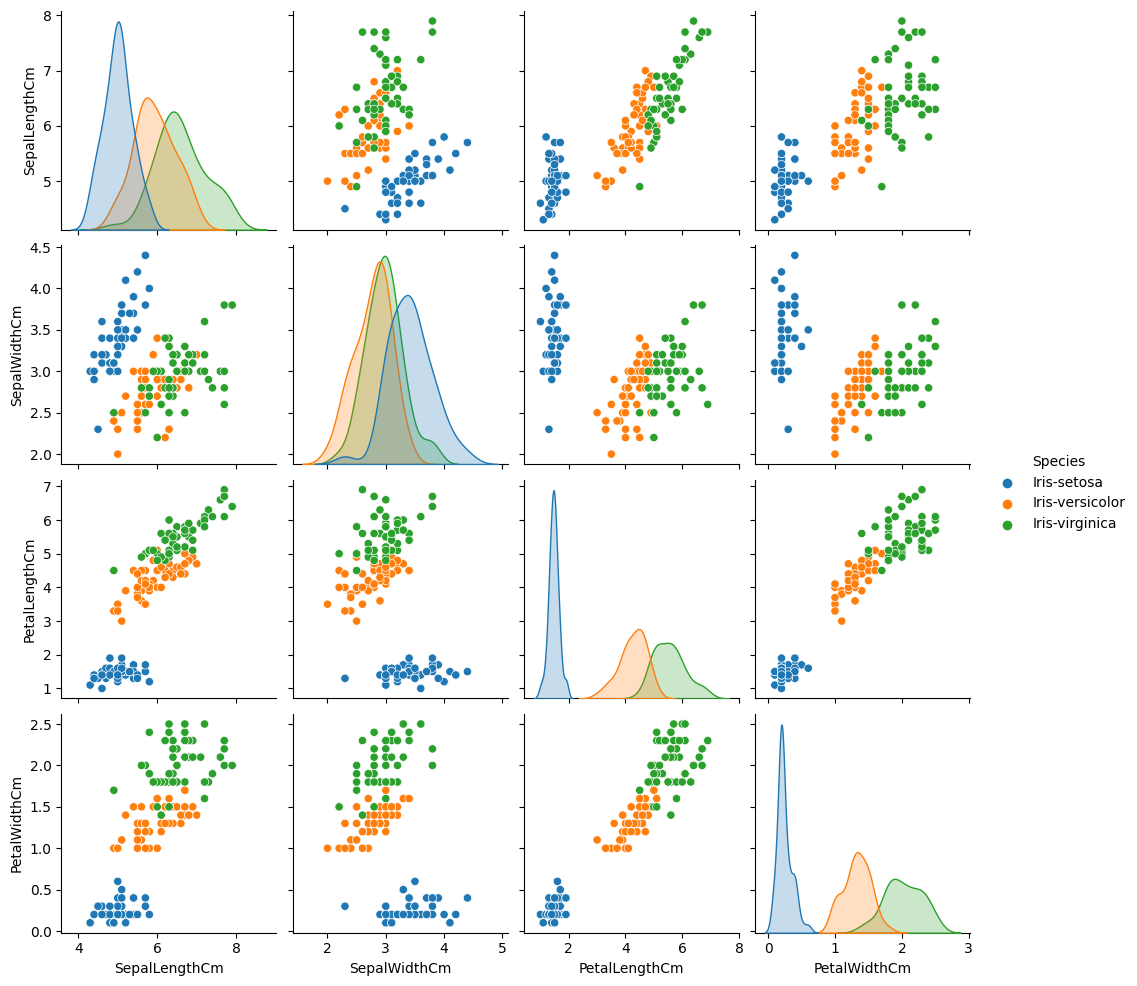

In [13]:
sns.pairplot(data=df[[col for col in df.columns if col!="Id" ]], hue="Species")
plt.show()

## 4.density plot

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

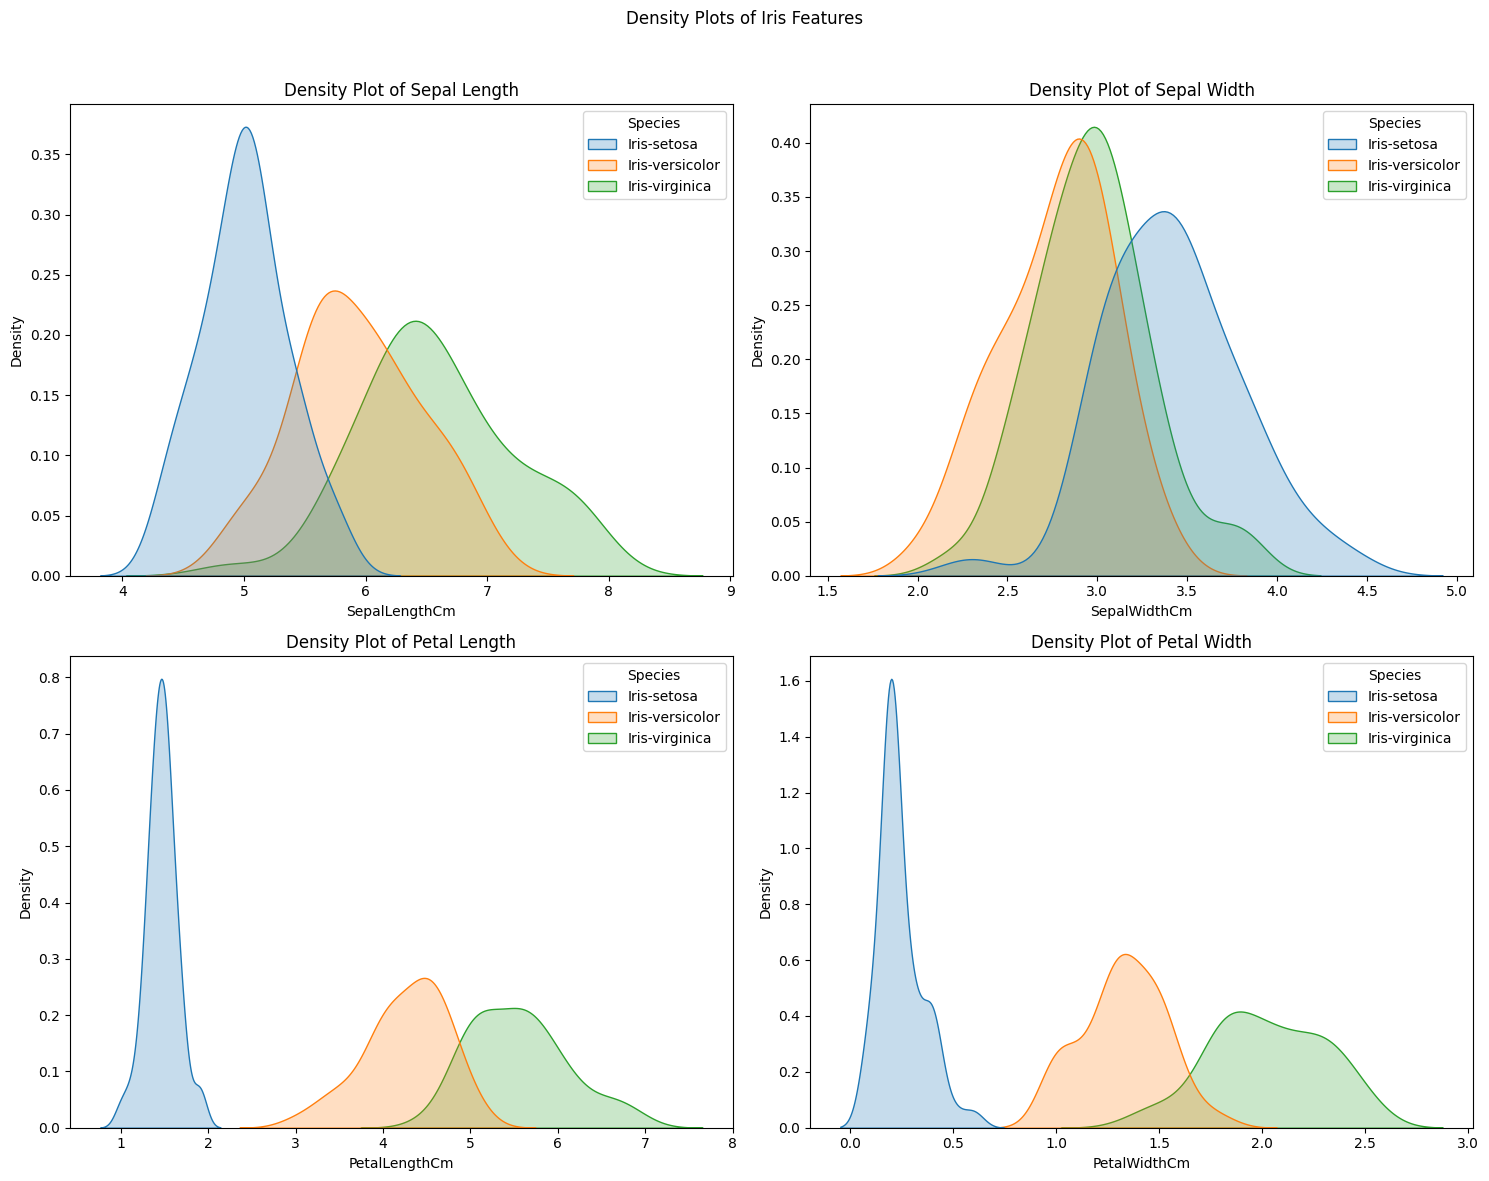

In [14]:
# Create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Sepal Length
sns.kdeplot(data=df[[col for col in df.columns if col!="Id"]], x='SepalLengthCm', hue='Species', fill=True, ax=axes[0, 0])
axes[0, 0].set_title('Density Plot of Sepal Length')

# Sepal Width
sns.kdeplot(data=df[[col for col in df.columns if col!="Id"]], x='SepalWidthCm', hue='Species', fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Density Plot of Sepal Width')

# Petal Length
sns.kdeplot(data=df[[col for col in df.columns if col!="Id"]], x='PetalLengthCm', hue='Species', fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Density Plot of Petal Length')

# Petal Width
sns.kdeplot(data=df[[col for col in df.columns if col!="Id"]], x='PetalWidthCm', hue='Species', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Density Plot of Petal Width')

plt.suptitle('Density Plots of Iris Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 5. correlation map

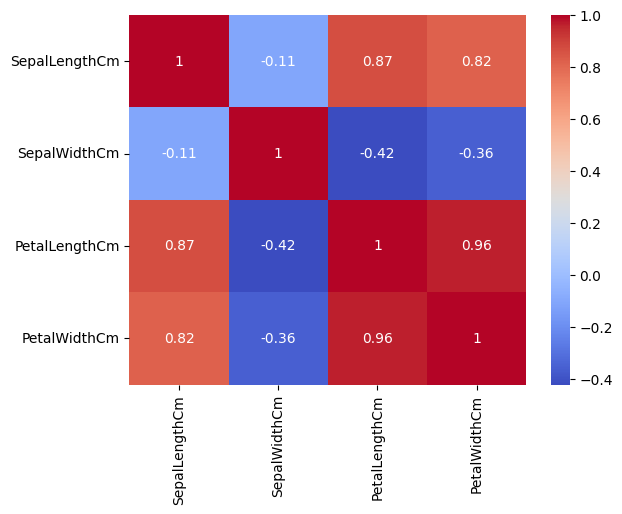

In [15]:
corr=df[col_features].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

## 6. post analysis actions

In [16]:
# dropping Id column
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])
# PetalLengthCm and PetalWidth are too correlated ,we should use their PCA corresponding feature
pca=PCA(n_components=1)
df["PetalPCA"]=pca.fit_transform(df[['PetalLengthCm','PetalWidthCm']])


In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalPCA
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.561371
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.561371
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.653526
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.469217
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.561371


In [18]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'PetalPCA'],
      dtype='object')

In [19]:
## dropping the 
df=df.drop(columns=['PetalLengthCm','PetalWidthCm'])

In [20]:
df.head(3)

,SepalLengthCm,SepalWidthCm,Species,PetalPCA
0,5.1,3.5,Iris-setosa,-2.561371
1,4.9,3.0,Iris-setosa,-2.561371
2,4.7,3.2,Iris-setosa,-2.653526


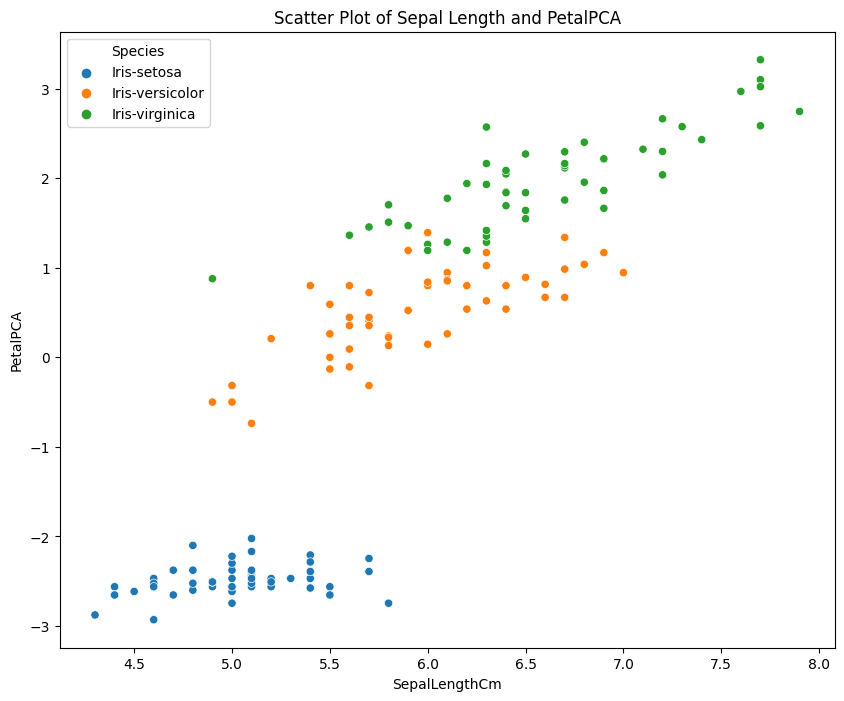

In [21]:
# Display the dataset using sepal_length and PetalPCA
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalPCA', hue='Species')
plt.title('Scatter Plot of Sepal Length and PetalPCA')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalPCA')
plt.show()

# Data Preprocessing

## 1. label encoding

In [22]:
lb=LabelEncoder()
df['Species']=lb.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

## 2. Data Standardization

In [23]:
col_features=[col for col in df.columns if col!="Species"]

In [24]:
st=StandardScaler()
df[col_features]=st.fit_transform(df[col_features])


In [25]:
df.head()

,SepalLengthCm,SepalWidthCm,Species,PetalPCA
0,-0.900681,1.032057,0,-1.343450
1,-1.143017,-0.124958,0,-1.343450
2,-1.385353,0.337848,0,-1.391786
3,-1.506521,0.106445,0,-1.295115
4,-1.021849,1.263460,0,-1.343450


## 3.data split(train/test/evaluation)

In [26]:
X = df.drop('Species', axis=1)
y = df['Species']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Modeling

## 1. training and Evaluation

In [28]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Dictionary of models
    models = {
        'SVM': SVC(),
        'Random Forest': RandomForestClassifier()
    }
    accuracies = {}

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracies[name] = accuracy

    return accuracies


In [29]:
# Train and evaluate models
accuracies = train_and_evaluate_models(X_train, X_test, y_train, y_test)



In [30]:
print(accuracies)

{'SVM': 1.0, 'Random Forest': 1.0}
